In [2]:
import pandas as pd
import numpy as np

In [1]:
# df = pd.read_csv(r'/home/uia72388/Share_A/New Data/MYDATA.csv', index_col=0)
# df.head()

In [4]:
vneed=[]
for i in df.columns:
    if (df[i].isnull().sum()==0):
        vneed.append(i)
    else:
        continue
len(vneed)        

39

In [2]:
# df1= df.loc[:, vneed]
# for i, x in enumerate(df1.columns):
#     print(i, x)

In [3]:
# df1['box0.classval'].value_counts()

In [4]:
# df1['box0.sign_class.'].head()

In [8]:
df1['box0.classval'].value_counts()

0    102728
6     36114
2     16281
5     15314
4     12932
1      5228
3      4376
Name: box0.classval, dtype: int64

In [9]:
df1['box0.classvalnew'] = df1['box0.classval'].copy()

In [10]:
# do this by making dict mapping or df[df['box0.classval']==0] or df1['box0.classvalnew'].loc[df1['box0.classval'] ==0] = 1
df1['box0.classvalnew'][np.where(df1['box0.classval']==0)[0]] =1
df1['box0.classvalnew'][np.where(df1['box0.classval']==1)[0]] =2
df1['box0.classvalnew'][np.where(df1['box0.classval']==2)[0]] =3
df1['box0.classvalnew'][np.where(df1['box0.classval']==3)[0]] =4
df1['box0.classvalnew'][np.where(df1['box0.classval']==4)[0]] =5
df1['box0.classvalnew'][np.where(df1['box0.classval']==5)[0]] =6
df1['box0.classvalnew'][np.where(df1['box0.classval']==6)[0]] =7

/home/uia72388/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/uia72388/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/uia72388/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.

In [11]:
df1['box0.classvalnew'].value_counts()

1    102728
7     36114
3     16281
6     15314
5     12932
2      5228
4      4376
Name: box0.classvalnew, dtype: int64

In [12]:
# 0    102728
# 6     36114
# 2     16281
# 5     15314
# 4     12932
# 1      5228
# 3      4376

In [13]:
df1['box0.classvalnew'].head()

0    1
1    1
2    1
3    1
4    1
Name: box0.classvalnew, dtype: int64

In [10]:
# for i, x in enumerate(df1.columns):
#     print(i, x)

In [9]:
# # df.columns[[1,2,5]]
# # cols=[1,2,4,5]
# data= df1.drop(df1.columns[[0,3,6,12,13,14,31,39]], axis=1)
# data.head()

In [16]:
X= data.values
y = df1['box0.classvalnew'].values

In [17]:
X.shape, y.shape

((192973, 32), (192973,))

In [18]:
np.unique(y) , len(np.unique(y))

(array([1, 2, 3, 4, 5, 6, 7]), 7)

In [19]:
import matplotlib.pyplot as plt

In [20]:
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
X_pca = sklearn_pca.fit_transform(X)

def plot_pca():

    ax = plt.subplot(111)

    for label in range(1, 8):
        plt.scatter(x=X_pca[:,0][y == label],
                y=X_pca[:,1][y == label],
                alpha=0.5,
                #label=newdict[label]
                )

    plt.xlabel('PC1')
    plt.ylabel('PC2')

    #leg = plt.legend(loc='upper right', fancybox=True)
    #leg.get_frame().set_alpha(0.5)
    #plt.title('PCA: Iris projection onto the first 2 principal components')

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.tight_layout
    plt.grid()

    plt.show()

In [21]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# LDA
sklearn_lda = LDA(n_components=2)
X_lda_sklearn = sklearn_lda.fit_transform(X, y)

def plot_scikit_lda(X, title):

    ax = plt.subplot(111)
    for label in range(1,8):
        plt.scatter(x=X[:,0][y == label],
                    y=X[:,1][y == label] * -1, # flip the figure
                    alpha=0.5)
                    #label=newdict[label])

    plt.xlabel('LD1')
    plt.ylabel('LD2')

    #leg = plt.legend(loc='upper right', fancybox=True)
    #leg.get_frame().set_alpha(0.5)
    plt.title(title)

    # hide axis ticks
    plt.tick_params(axis="both", which="both", bottom="off", top="off",  
            labelbottom="on", left="off", right="off", labelleft="on")

    # remove axis spines
    ax.spines["top"].set_visible(False)  
    ax.spines["right"].set_visible(False)
    ax.spines["bottom"].set_visible(False)
    ax.spines["left"].set_visible(False)    

    plt.grid()
    plt.tight_layout
    plt.show()

/home/uia72388/anaconda3/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


/home/uia72388/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


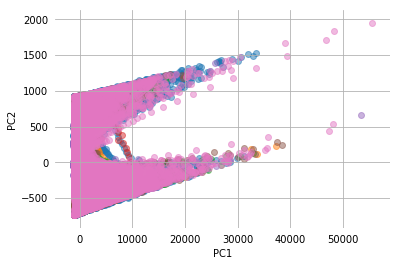

In [22]:
plot_pca()

/home/uia72388/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


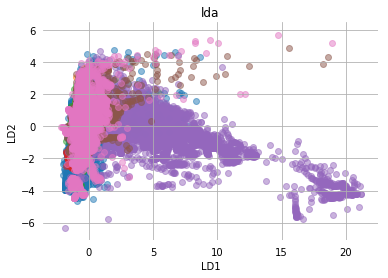

In [23]:
plot_scikit_lda(X_lda_sklearn, title= 'lda')

In [24]:
import pandas as pd
import pylab as pl
from sklearn import datasets
from sklearn.decomposition import PCA

# load dataset
# iris = datasets.load_iris()
# df = pd.DataFrame(iris.data, columns=iris.feature_names)



In [25]:
# normalize data
from sklearn import preprocessing
data_scaled = pd.DataFrame(preprocessing.scale(data),columns = data.columns) 

# PCA
pca = PCA(n_components=2)
pca.fit_transform(data_scaled)

# Dump components relations with features:
dfnew  =pd.DataFrame(pca.components_,columns=data.columns,index = ['PC-1','PC-2'])

In [8]:
# dfnew

In [27]:
#np.where(df1['box0.area']==0.031181)

In [28]:
pca.components_

array([[ 0.03118095,  0.01612597,  0.00730797,  0.02285152,  0.0393811 ,
        -0.02314098, -0.02018007, -0.25572681, -0.2682648 ,  0.00187989,
        -0.39811075,  0.39551466,  0.39811075, -0.12480279,  0.39811075,
         0.00637763, -0.03671128,  0.01430933,  0.16770914,  0.01789011,
        -0.09910585, -0.07526144, -0.08069502,  0.00567427, -0.05611526,
         0.32901857,  0.06319582,  0.06789109, -0.05442566,  0.10988263,
         0.01157501,  0.15363461],
       [ 0.51310824,  0.02532298, -0.04114552,  0.51204961,  0.52317003,
         0.08911908,  0.12425091, -0.27703253, -0.12068004, -0.01245408,
         0.08777963, -0.08870674, -0.08777963, -0.09286278, -0.08777963,
         0.00156227,  0.02210422, -0.00220645, -0.00937552,  0.00994181,
        -0.10432559, -0.09090872, -0.02805832,  0.02639117, -0.0631695 ,
        -0.06836259,  0.03207588,  0.03215042,  0.02424857, -0.06800964,
        -0.01835102, -0.08024046]])

In [29]:
pca.components_.shape

(2, 32)

In [7]:
# dfnew.abs().sum(axis=0)

In [33]:
#pcs means eigenvectors. find greatest eigen values. 

In [34]:
#fit_transform n=2
#pca.transform(X)[:, :ncomp] , pca.transform(X)[:, :ncomp].shape
# ncomp = 2
# Xhat = np.dot(pca.transform(X)[:, :ncomp], pca.components_[:ncomp, :])
# Xhat += mu

In [35]:
#trans.shape, comps.shape

NameError: name 'trans' is not defined

In [81]:
# inv = np.linalg.pinv(trans)
# inv , inv.shape

(array([[-1.17313670e-09,  1.19986147e-08, -1.15722008e-09, ...,
         -8.13183202e-10, -7.86898603e-10, -8.13046328e-10],
        [ 1.05291668e-08,  3.56523365e-08,  1.06095655e-08, ...,
          2.82946325e-09,  2.80371267e-09,  2.76834885e-09]]), (2, 192973))

In [37]:
# Xhat = np.dot(inv, comps)
# Xhat += mu
# Xhat

In [36]:
# Xhat = np.dot(pca.transform(X)[:, :ncomp], pca.components_[:ncomp, :])
# Xhat += mu

In [38]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [39]:
Xstd = sc.fit_transform(X)
Xstd, Xstd.shape

(array([[-0.4795529 , -0.06175153, -0.17944134, ..., -0.48573786,
         -0.07213757, -0.38968905],
        [ 4.94981319, -0.08782903, -0.17944134, ..., -0.48573786,
         -0.07213757, -0.38968905],
        [-0.47298663,  0.14128049, -0.17944134, ..., -0.48573786,
         -0.07213757, -0.38968905],
        ...,
        [-0.33415695,  0.06745067, -0.17944134, ..., -0.48573786,
         -0.07213757, -0.38968905],
        [-0.32336951, -0.06175153, -0.17944134, ..., -0.48573786,
         -0.07213757, -0.38968905],
        [-0.33415695, -0.18533624, -0.17944134, ..., -0.48573786,
         -0.07213757, -0.38968905]]), (192973, 32))

In [40]:
cov_mat = np.cov(Xstd.T)
cov_mat , cov_mat.shape

(array([[ 1.00000518, -0.00413405, -0.03833391, ..., -0.02582052,
         -0.00789836, -0.03466189],
        [-0.00413405,  1.00000518,  0.31806623, ...,  0.04546347,
          0.00229746,  0.03493667],
        [-0.03833391,  0.31806623,  1.00000518, ...,  0.03425834,
         -0.01092788,  0.04681411],
        ...,
        [-0.02582052,  0.04546347,  0.03425834, ...,  1.00000518,
          0.13493505,  0.81541342],
        [-0.00789836,  0.00229746, -0.01092788, ...,  0.13493505,
          1.00000518, -0.02811137],
        [-0.03466189,  0.03493667,  0.04681411, ...,  0.81541342,
         -0.02811137,  1.00000518]]), (32, 32))

In [41]:
evals, evecs = np.linalg.eig(cov_mat)
for x,y in zip(evals,evecs):
    print(x, ':', y, '\n')

5.530571498929031 : [-3.11809488e-02 -5.13108252e-01  6.29161297e-02  5.49287725e-02
  1.64658974e-01 -1.00452378e-01  7.93656284e-01 -1.25339184e-01
  4.59767355e-03  9.68025501e-06 -8.65245203e-02 -2.55403823e-02
  9.46388168e-03 -1.29007460e-01 -8.58166076e-02 -6.80881788e-03
  1.46590234e-02 -5.47994116e-04  5.81552508e-02 -1.03140907e-02
 -8.22702367e-02  3.51116777e-03 -2.88370722e-02  3.11576963e-02
  2.98315657e-02  7.32311702e-03 -2.08191671e-02  1.27443065e-03
 -1.75322192e-16  3.44111084e-16  2.83679216e-16 -1.87432227e-17] 

3.156978680542683 : [-1.61258886e-02 -2.53180021e-02  1.04382508e-01 -1.51097118e-01
 -4.59396405e-01 -3.51188598e-01 -3.66423877e-02 -2.74261177e-01
 -2.78356307e-02  7.73438298e-04 -8.77370558e-02  1.05450575e-02
 -8.73260149e-02  1.42427244e-01 -4.35365149e-01  4.58150940e-01
 -1.62044435e-01 -1.33248386e-01  1.74799043e-01  3.58690898e-02
  6.97717174e-02 -1.16710726e-01 -5.58377245e-02 -4.27166344e-02
  4.66140054e-02 -7.50731032e-02  6.13449849e-0

In [42]:
len(evals) , len(evecs), evecs.shape

(32, 32, (32, 32))

In [43]:
tot = sum(evals)
var_exp = [(i/tot) for i in evals]
cumvar_exp = np.cumsum(var_exp)
print('tot:', tot)
print('var_exp:', var_exp)
print('cumsum_varexp:', cumvar_exp)

tot: 32.000165827166654
var_exp: [0.17282946372214836, 0.09865507252661031, 0.08277379707711983, 0.06218885337076528, 0.051585235037726794, 0.04658090429423245, 0.002465512040503613, 0.0016307713025833608, 0.003924241744863288, 5.5133676836324125e-05, 0.04266613503098895, 0.010755025648583754, 0.012131891839056365, 0.017314069144192906, 0.018687776554070685, 0.02024264015375827, 0.021386171598301258, 0.035831019722968635, 0.03444696927622273, 0.03358737621062105, 0.025269985904211794, 0.026776611548610264, 0.027272170952135424, 0.03129847593648954, 0.03104291294728054, 0.02885728542040447, 0.029621947094635784, 0.030122550224078184, 2.153843939118328e-17, 2.974437639492963e-18, -1.4144830771861905e-17, -1.695150392385967e-17]
cumsum_varexp: [0.17282946 0.27148454 0.35425833 0.41644719 0.46803242 0.51461333
 0.51707884 0.51870961 0.52263385 0.52268898 0.56535512 0.57611015
 0.58824204 0.60555611 0.62424388 0.64448652 0.66587269 0.70170371
 0.73615068 0.76973806 0.79500805 0.82178466 0.8

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('whitegrid')

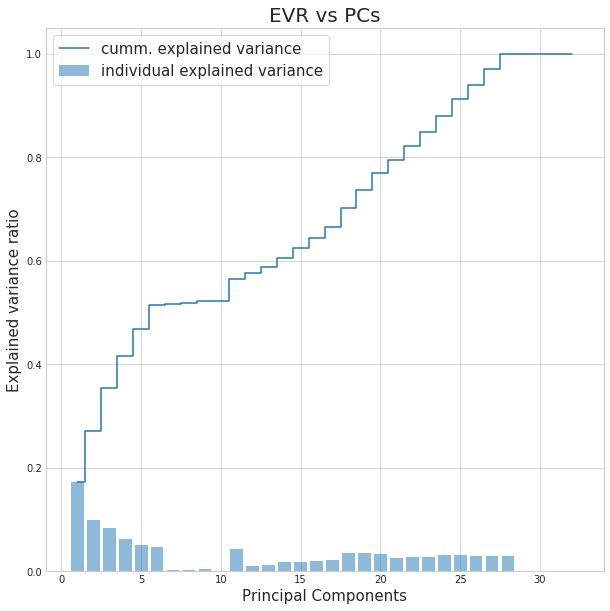

<Figure size 432x288 with 0 Axes>

In [57]:
plt.figure(figsize=(10,10))
plt.bar(range(1,33), var_exp, alpha=0.5, align='center', label= 'individual explained variance')
plt.step(range(1,33), cumvar_exp, where='mid', label='cumm. explained variance')
plt.xlabel('Principal Components', fontsize=15)
plt.ylabel('Explained variance ratio', fontsize=15)
plt.legend(loc='best', frameon=True,prop={'size':15})
plt.title('EVR vs PCs', fontsize=20)
#plt.xticks(range(1,33))
plt.show()
plt.savefig('EVR.jpg')

In [6]:
# for i, x, y in zip(range(1,33), data.columns, var_exp):
#     print(i, ':', x, ':', y)

In [5]:
# for i, x in zip(range(1,33), data.columns):
#     print(i, ':', x)